In [1]:
#importing needed packages to parse json, read xml file
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
#THIS BEGINS THE CODE TO READ THE XML FILE
#creating basic objects for parsing
tree = ET.parse('/Users/awburns2/Documents/Github/data-scientist-exercise02/data/AviationData.xml')
root = tree.getroot()

In [3]:
#checking the root tag
root.tag

'{http://www.ntsb.gov}DATA'

In [4]:
#checking if root has any attributes
root.attrib

{}

In [5]:
#checking child notation
for child in root:
    print(child.tag, child.attrib)

{http://www.ntsb.gov}ROWS {}


In [6]:
#finding the element tags and structure of the xml file
#root is DATA, followed by ROWS and then ROW
#most of the information is stored within ROW
#[elem.tag for elem in root.iter()]


In [7]:
#confirmed event information is stored within ROW
#observing structure and noticing important information is tag wise
#for row in root.iter('{http://www.ntsb.gov}ROW'):
#    print(row.attrib)

In [162]:
#confirming methodology that information can be found using @ notation for data collection
#for accident in root.findall("./{http://www.ntsb.gov}ROWS/{http://www.ntsb.gov}ROW[@EventId='20070804X01107']"):
#    print(accident.attrib)

In [42]:
#After reviewing the information within the xml file
#it was determined that eventid, eventdate, injury severity, aircraft damage, total fatal, total serious,
#total minor and total uninjured could be important tags for future analysis to add onto the json files

In [60]:
#writing code to create df structure for analysis of xml file

#creating empty lists to store each respective tag of the xml file
eventid = []
eventdate = []
injuryseverity = []
aircraftdamage = []
totalfatal = []
totalserious = []
totalminor = []
totaluninjured = []
location = []
country = []


#grabbing the tags to store in a df and adding them to the empty lists
for tag in root.findall("./{http://www.ntsb.gov}ROWS/{http://www.ntsb.gov}ROW"):
    e_tag = tag.get('EventId') 
    ed_tag = tag.get('EventDate')
    is_tag = tag.get('InjurySeverity')
    ad_tag = tag.get('AircraftDamage')
    tfi_tag = tag.get('TotalFatalInjuries')
    tsi_tag = tag.get('TotalSeriousInjuries')
    tmi_tag = tag.get('TotalMinorInjuries')
    tui_tag = tag.get('TotalUninjured')
    loc_tag = tag.get('Location')
    cntry_tag = tag.get('Country')
    
    eventid.append(e_tag)
    eventdate.append(ed_tag)
    injuryseverity.append(is_tag)
    aircraftdamage.append(ad_tag)
    totalfatal.append(tfi_tag)
    totalserious.append(tsi_tag)
    totalminor.append(tmi_tag)
    totaluninjured.append(tui_tag)
    location.append(loc_tag)
    country.append(cntry_tag)

In [61]:
#creating df of xml file
df_xml = pd.DataFrame({'EventId':eventid, 
                      'EventDate':eventdate,
                      'Inj_Sev':injuryseverity,
                      'AC_Dam':aircraftdamage,
                      'Total_Fatal':totalfatal,
                      'Total_Serious':totalserious,
                      'Total_Minor':totalminor,
                      'Total_Uninjured':totaluninjured,
                      'Location':location,
                      'Country':country})

#final df will contain every entry of the tags chosen for the entire xml file

In [46]:
#checking structure of newly created df for xml
#df_xml.head(10)

In [47]:
#reviewing unique values of aircraft damage and noting that damage is not descriptive
#df_xml['AC_Dam'].unique()

In [48]:
#checking row count of injury severity column and if there is useful info to be pulled
#df_xml.groupby('Inj_Sev').count()

#noticing that 61249/77257 (~80%) of accidents were labeled as non-fatal or incident 
#77257 comes from the total observations in df_xml

In [62]:
#making numeric columns floats instead of character to analyze missingness
df_xml['Total_Fatal'] = pd.to_numeric(df_xml['Total_Fatal'], errors='coerce').astype('float64')
df_xml['Total_Serious'] = pd.to_numeric(df_xml['Total_Serious'], errors='coerce').astype('float64')
df_xml['Total_Minor'] = pd.to_numeric(df_xml['Total_Minor'], errors='coerce').astype('float64')
df_xml['Total_Uninjured'] = pd.to_numeric(df_xml['Total_Uninjured'], errors='coerce').astype('float64')

In [63]:
#reviewing missing to see completeness of data
#df_xml['Total_Fatal'].isna().sum()/len(df_xml)
#Total Fatal -- ~28% missing
#df_xml['Total_Serious'].isna().sum()/len(df_xml)
#Total Serious -- ~30% missing
#df_xml['Total_Minor'].isna().sum()/len(df_xml)
#Total Minor -- ~29% missing
#df_xml['Total_Uninjured'].isna().sum()/len(df_xml)
#Total Uninjured -- ~15% missing

#Because data has a significant amount of missing, imputations could be tougher and could be better to focus
#on more complete text data

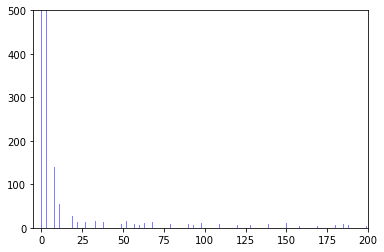

In [64]:
#running quick histogram to confirm notion that even least missing column (Total Injured) is sparse
#also noting it is right-skewed

n, bins, patches = plt.hist(x=df_xml['Total_Uninjured'], bins='auto', facecolor='blue', alpha=.5)

plt.xlim([-5,200])
plt.ylim([0,500])

plt.show()

In [18]:
#THIS BEGINS THE CODE TO READ THE JSON FILES
#creating a filepath for a test json
f = open('/Users/awburns2/Documents/Github/data-scientist-exercise02/data/NarrativeData_28999.json')

In [19]:
#loading the json file into an object
data = json.load(f)

In [163]:
#printing the file to understand the general structure
#each section contains EventId, narrative, and probable_cause
#for i in data['data']:
#    print(i)

In [21]:
#checking the length of the file to confirm the notation for each json file
#most json files contain 500 report entries based on interval notation of the file names
#len(data['data'])

In [22]:
#Decided to create a df that can be joined with df_xml to get full picture of data
#Will read all the json files into the notebook to get most complete data possible

In [23]:
#creating format to read all json files
path_to_json = '/Users/awburns2/Documents/Github/data-scientist-exercise02/data/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
#json_files will be a list of all the names of the json files in the directory storing the case study data

In [24]:
#create an empty df to read the json files into
data_json = pd.DataFrame(columns=['EventId', 'Narrative', 'Probable_Cause'])

In [25]:
#enumerating through json files
for index, js in enumerate(json_files):
    #loop will run through all the json files reading in the eventid, narrative and probable_cause for all entries in every file
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        for i, info in enumerate(json_text['data']):
        
        
            #saving relevant information
                
            EventId = json_text['data'][i]['EventId']
            Narrative = json_text['data'][i]['narrative']
            Probable_Cause = json_text['data'][i]['probable_cause']
            
            #keep note of which index to add the new row
            count = data_json['EventId'].count()
            
            #adding row to df
            data_json.loc[count] = [EventId, Narrative, Probable_Cause]

In [52]:
#checking general structure of json file df
#data_json.head()

In [65]:
#creating final df with all json info and additional relevent xml entries
df_combf = pd.merge(data_json, df_xml, how='inner', on=['EventId','EventId'])

In [28]:
#Based on completeness of the data, will focus on the text of the probable causes and report back with clustering analysis

In [29]:
#THIS BEGINS THE CODE TO ANALYZE THE TEXT OF PROBABLE CAUSE
#only using first 300 entries to not overload computer with size of text file
df_comb = df_combf[:300]

In [30]:
#import stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

#import packages to tokenize and stem words
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [31]:
#creating porter stemmer and empty list to store tokenized words
stem=PorterStemmer()

#creating empty list of tokenized and stemmed words
tokenized_cause=[]

In [32]:
#Run through causes, tokenize and stem, creates a list with a 
#list of words for each cause
for line in range(0,len(df_comb['Probable_Cause'])):
    #tokenizing each probable cause entry
    tokenized_word = word_tokenize(df_comb.iloc[line,2])
    for word in range(0,len(tokenized_word)):
        #stemming tokenized words 
        tokenized_word[word] = stem.stem(tokenized_word[word])
    tokenized_cause.append(tokenized_word)

In [33]:
#Filter out all the stop words
filtered_cause=[]
#ranging through the length for total entries
for i in range(0,len(df_comb['Probable_Cause'])):
    #creating intermediate list for loop
    filtered_cause_int=[]
    #ranging though length of words in each respective entry
    for j in range(0,len(tokenized_cause[i])):
        #lowercase every word
        tokenized_cause[i][j]=tokenized_cause[i][j].lower()
        #if word not in stop words, add to final list
        if tokenized_cause[i][j] not in stop_words:
            filtered_cause_int.append(tokenized_cause[i][j])
    
    filtered_cause.append(filtered_cause_int)

In [34]:
#Join filtered causes back from list of lists to individual causes in a list to visualize again
causes_final_list = []

for i in filtered_cause:
    temp = " ".join(i)
    causes_final_list.append(temp)

In [35]:
#use to see new filtered and stemmed causes without stop words
#causes_final_list

In [36]:
#read packages for feature extracting
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
#Count raw term frequencies

count = CountVectorizer()
term_vec = count.fit_transform( causes_final_list )

#number of concepts was changed through experimentation until topics became distinct
#elbow plots could be used in the future to create optimal clusters
n_concepts = 5

In [38]:
# Build a string list of topics

col_nm = [ ]
for i in range( 1, n_concepts + 1 ):
    col_nm += [ f'Concept {i}' ]

In [39]:
# Fit an LDA model to the term vectors, get cosine similarities

lda_model = LDA( n_components=n_concepts, random_state = 1 )
concept = lda_model.fit_transform( term_vec )
X = cosine_similarity( concept )

In [164]:
# Print top 5 terms for each topic

feat = count.get_feature_names()
topic_list = [ ]
for i,topic in enumerate( lda_model.components_ ):
    top_n = [ feat[ i ] for i in topic.argsort()[ -10: ] ]
    top_feat = ' '.join( top_n )
    topic_list.append( f"topic_{'_'.join(top_n[ :3 ] ) }" )

    print( f'Concept {i+1}: {top_feat}' )
print()

Concept 1: accid inadequ result wa loss engin failur power fuel pilot
Concept 2: runway result in failur flight terrain control land dure pilot
Concept 3: accid contribut result wa flight maintain factor failur land pilot
Concept 4: gust runway condit factor wa takeoff failur pilot dure wind
Concept 5: dure engin loss maintain factor land control result pilot failur



In [ ]:
#THIS STARTS VIZ CODE FOR ANALYZING TOTAL ACCIDENTS PER STATE

In [69]:
#confirming USA is only designated as 'United States'

#df_combf['Country'].unique()

In [80]:
#subsetting data to only contain US
us_acc = df_combf[df_combf['Country'] == 'United States']

In [98]:
#creating a new column which grabs the last two characters of the location variable 
#which for US located accidents are mainly states
state = us_acc['Location'].str.strip().str[-2:]

us_acc['State'] = state

/Users/awburns2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
us_acc['State'].unique()

#remove AS, AO, GM, GU, PR, blanks, VI, PO, MP, UN, FN, ON, DC as these reference islands, oceans, territories, Washington DC, etc.
#for this analysis will only focus on mainland US states, HI, and AK

array(['FL', 'NY', 'WI', 'AZ', 'NC', 'HI', 'OR', 'TX', 'CA', 'NM', 'OK',
       'NV', 'IN', 'AK', 'IL', 'SC', 'PA', 'GA', 'ID', 'MO', 'ME', 'LA',
       'ND', 'AR', 'KY', 'MI', 'MN', 'MD', 'NE', 'CO', 'MT', 'WA', 'OH',
       'AL', 'WV', 'IA', 'KS', 'WY', 'NJ', 'VA', 'MS', 'VT', 'UT', 'NH',
       'MA', 'TN', 'CT', 'RI', 'DC', 'SD', 'DE'], dtype=object)

In [137]:
#creating list to remove extra values
remove = ['AS', 'AO', 'GM', 'GU', 'PR', '', 'VI', 'PO', 'MP', 'UN', 'FN', 'ON', 'DC']

In [138]:
#keeping only mainland US states, HI, and AK
us_acc = us_acc[~us_acc['State'].isin(remove)]

In [142]:
#creating new df which will count the number of accidents per state
us_state_total = us_acc.groupby('State').size().reset_index(name='Total Accidents')

In [160]:
#creating map of accidents
import plotly.express as px

fig = px.choropleth(us_state_total,  #input Pandas DataFrame
                    locations="State",  #DataFrame column with locations
                    color="Total Accidents",  #DataFrame column with color values
                    hover_name="State", #DataFrame column hover info
                    locationmode = 'USA-states',
                   color_continuous_scale= 'Reds') #Set to plot as US States
fig.update_layout(
    title_text = 'Reported US Aviation Accident Total 1948 - 2015', #Create a Title
    geo_scope='usa',  #Plot only the USA instead of globe
)
fig.show()

In [155]:
#changing event date string to be in date format
df_combf['EventDate'] = pd.to_datetime(df_combf['EventDate'])

In [165]:
#seeing the earliest and latest times for the accidents
#df_combf.sort_values('EventDate')